In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [ ]:
df = pd.read_excel('Data/obesity raw.xlsx')

In [19]:
df

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,493,Male,20,1.80,65.0,no,yes,2,3,Frequently,no,1,no,2,0,Sometimes,Motorbike,Normal_Weight
494,494,Female,18,1.67,66.0,no,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Normal_Weight
495,495,Male,19,1.80,60.0,yes,yes,3,1,Always,no,1,yes,0,0,no,Motorbike,Normal_Weight
496,496,Male,18,1.72,53.0,yes,yes,2,3,Sometimes,no,2,no,0,2,Sometimes,Public_Transportation,Insufficient_Weight


In [20]:
df.drop('Unnamed: 0', axis=1, inplace=True)


# EDA

In [21]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,23.146586,1.686386,69.569880,2.325301,2.658635,1.923695,1.162651,0.660643
std,6.721583,0.097653,17.013226,0.590504,0.919242,0.678945,1.024671,0.722794
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.612500,58.000000,2.000000,3.000000,1.000000,0.000000,0.000000
50%,21.000000,1.680000,67.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,24.000000,1.750000,80.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [22]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

In [23]:
for column in categorical_features:
    if column != 'Age': 
        print(df[column].value_counts())
        print()

Gender
Male      271
Female    227
Name: count, dtype: int64

family_history_with_overweight
yes    300
no     198
Name: count, dtype: int64

FAVC
yes    348
no     150
Name: count, dtype: int64

CAEC
Sometimes     289
Frequently    136
Always         53
no             20
Name: count, dtype: int64

SMOKE
no     466
yes     32
Name: count, dtype: int64

SCC
no     443
yes     55
Name: count, dtype: int64

CALC
Sometimes     273
no            179
Frequently     45
Always          1
Name: count, dtype: int64

MTRANS
Public_Transportation    326
Automobile                99
Walking                   55
Motorbike                 11
Bike                       7
Name: count, dtype: int64

NObeyesdad
Normal_Weight          287
Overweight_Level_I      58
Overweight_Level_II     58
Obesity_Type_I          47
Insufficient_Weight     34
Obesity_Type_II         11
Obesity_Type_III         3
Name: count, dtype: int64



# TRANSFORM KATEGORIK KE NUMERIK

In [24]:
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [25]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# NORMALISASI DATA

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# SPLIT DATA

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# MODEL ML YANG DIGUNAKAN


In [28]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# MELATIH MODEL

In [29]:
results = []

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)  
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred) 

    report = classification_report(y_test, y_pred, output_dict=True)['weighted avg']
    results.append({
        'Model': model_name,
        'CV Mean Accuracy': scores.mean(),
        'Test Accuracy': test_accuracy,
        'Precision': report['precision'],
        'Recall': report['recall'],
        'F1-Score': report['f1-score']
    })


results_df = pd.DataFrame(results)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn

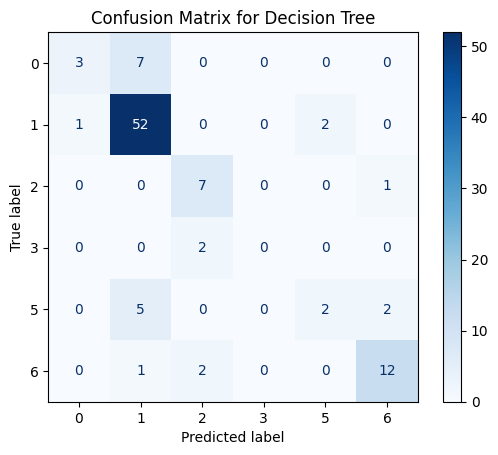

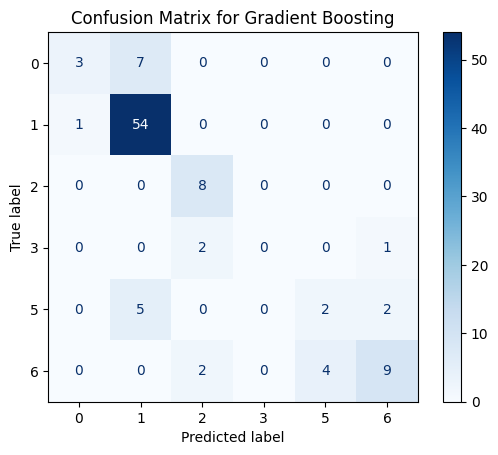

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
for model_name, model in models.items():
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
   
    classes = sorted(set(y_test))  
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# HASIL 

In [31]:
results_df

,Model,CV Mean Accuracy,Test Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.778956,0.76,0.735882,0.76,0.723646
1,Gradient Boosting,0.819177,0.77,0.732756,0.77,0.736333


In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [33]:
decision_tree_model = models["Decision Tree"]

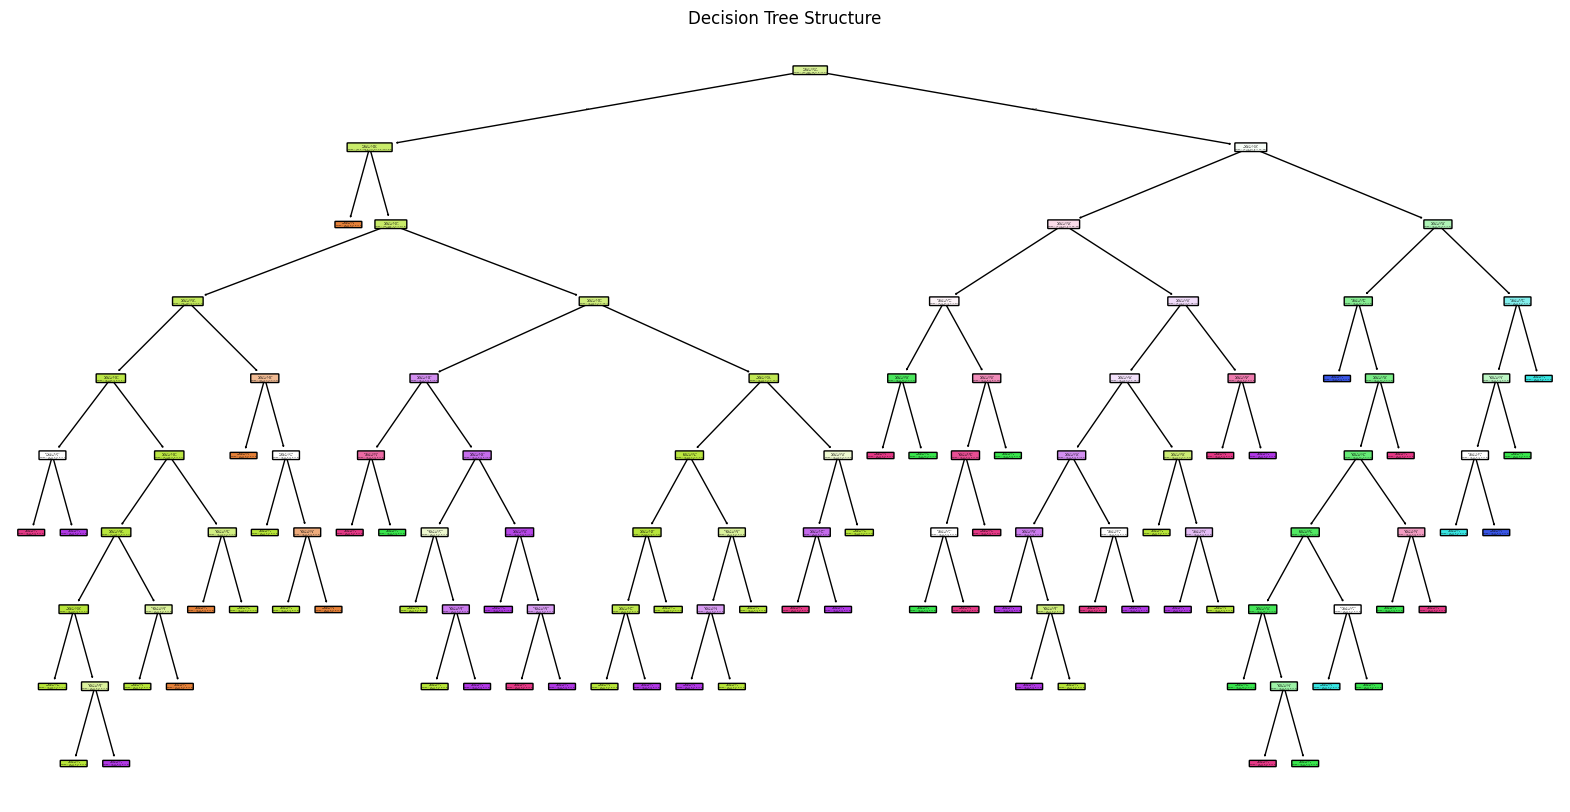

In [ ]:
class_names = [str(class_name) for class_name in decision_tree_model.classes_]


plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree_model,
    filled=True,
    class_names=class_names,
    rounded=True
)
plt.title("Decision Tree Structure")
plt.show()

# GRID SEARCH

In [ ]:
tuned_results = {}

param_grids = {
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30, 40, 50],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.5],
        "max_depth": [3, 5, 7]
    }
}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=3,
        scoring='accuracy',
        verbose=0
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy, precision, recall, and F1 score
    cv_mean_score = grid_search.best_score_
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Change 'weighted' to 'macro' or 'weighted' for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')  # Change 'weighted' to 'macro' or 'weighted' for multi-class
    f1 = f1_score(y_test, y_pred, average='weighted')  # Change 'weighted' to 'macro' or 'weighted' for multi-class
    
    # Store the results
    tuned_results[model_name] = {
        "CV Mean Score": cv_mean_score,
        "Best Parameters": grid_search.best_params_,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

Tuning Decision Tree...


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tuning Gradient Boosting...


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
for model_name, result in tuned_results.items():
    print(f"Results for {model_name}:")
    print(f"  CV Mean Score: {result['CV Mean Score']:.4f}")
    print(f"  Best Parameters: {result['Best Parameters']}")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  Precision: {result['Precision']:.4f}")
    print(f"  Recall: {result['Recall']:.4f}")
    print(f"  F1 Score: {result['F1 Score']:.4f}")

Results for Decision Tree:
  CV Mean Score: 0.7486
  Best Parameters: {'max_depth': 40, 'min_samples_split': 2}
  Accuracy: 0.7600
  Precision: 0.7285
  Recall: 0.7600
  F1 Score: 0.7256
Results for Gradient Boosting:
  CV Mean Score: 0.8342
  Best Parameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}
  Accuracy: 0.7800
  Precision: 0.7594
  Recall: 0.7800
  F1 Score: 0.7556
